In [60]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('/content/agaricus-lepiota.csv', sep = ';', header = None)

In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8118,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8119,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8120,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [38]:
with open('/content/names.txt', 'r') as f:
  file_text = []
  for line in f:
    file_text.append(line)

In [39]:
attribute_names = ['class']
for atr in file_text:
  name = atr[: atr.find(':')]
  name = name[atr.find('. ') + 2 :]
  attribute_names.append(name)

In [40]:
attribute_names

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises?',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [41]:
df.columns = attribute_names

In [42]:
df

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8118,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8119,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8120,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Зберігаємо знінений файл

In [44]:
df.to_csv('/content/agaricus-lepiota1.csv', sep = ';', index = False)

# Предобработка данных

Определим число уникальных значений каждого показателя, чтобы выяснить:

   - какие столбцы имеют по всем строкам одинаковое значение и удалить их, так как они не несут в себе никакой полезной информации с точки зрения анализа данных;
   - какие столбцы имеют символы пропущенных значений, например: «?», NaN, NULL, None и т.д.


Получить массив уникальных значений столбца можно с помощью метода pandas.Series.unique(). Объектом Series является каждый столбец DataFrame, если обратится к нему через индексы следующим образом:

In [47]:
df.iloc[:, 0]

,class
0,e
1,p
2,e
3,e
4,e
5,e
6,p
7,e
8,e
9,e


In [48]:
type(df.iloc[:, 0])

pandas.core.series.Series

In [49]:
df.iloc[:, 0].unique()

array(['e', 'p'], dtype=object)

Как видно, столбец class с индексом 0 имеет два уникальных значения: e, p.

С помощью цикла выведем в консоль уникальные значения всех столбцов:

In [52]:
print('Уникальные значения столбцов:')
for col in df.columns:
  print(col, df.loc[:, col].unique())

Уникальные значения столбцов:
class ['e' 'p']
cap-shape ['b' 'x' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['w' 'g' 'y' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises? ['t' 'f']
odor ['l' 'p' 'n' 'a' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['n' 'k' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['c' 'e' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['n' 's' 'a' 'v' 'y' 'c']
habitat ['m' 'u' 'g' 'd' 'p' 'w' 'l']


Выведем количество уникальных значений для каждого столбца:

In [53]:
for col in df.columns:
  print(col, len(df.loc[:, col].unique()))

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises? 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


veil-type 1 - столбец с одним уникальным значением, его следует удалить.

Удалить столбцы с одним уникальным значением можно с помощью метода drop(), принимающего в качестве параметра название столбца и индекс оси (axis) – 0 для удаления строки и 1 для удаления столбца:

In [54]:
for col in df.columns:
  if len(df[col].unique()) == 1:
    print(f'удаления столбца: {col}')
    df = df.drop(labels = col, axis = 1)

удаления столбца: veil-type


# Поиск пропущенных значений

Автоматизировать процесс поиска пропущенных значений бывает затруднительно в связи с разными символами пропущенных значений в каждом наборе данных. В рассматриваемом наборе данных таким символом является «?».

Выведем список столбцов с символом пропущенных значений «?»:

In [55]:
for col in df.columns:
  if '?' in df[col].unique():
    print(col,df[col].unique() )


stalk-root ['c' 'e' 'b' 'r' '?']


В нашем случае только столбец «stalk-root» имеет пропущенные значения.

Подсчитаем количество пропущенных значений. Для этого необходимо взять не весь столбец таблицы DataFrame, а лишь те ячейки, которые удовлетворяют условию.

Отбор значений столбца по условию осуществляется следующим образом:

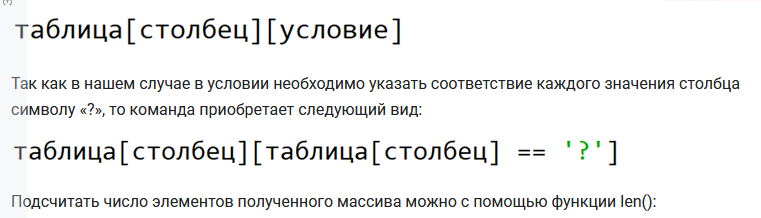

In [57]:
len(df['stalk-root'][df['stalk-root'] == '?'])

2480

Таким образом мы можем вывести список столбцов с пропущенными значениями и число пропущенных значений:

In [59]:
for col in df.columns:
  if '?' in df[col].unique():
    n = len(df[col][df[col] == '?'])
    k = len(df)
    print(col,df[col].unique(), n, f'{round(n / k * 100, 2)}%')

stalk-root ['c' 'e' 'b' 'r' '?'] 2480 30.53%


# Обработка пропущенных значений

Существуют разные **стратегии обработки пропущенных значений**, зависящие от исследуемого набора данных:

 - Если строк с пропущенными значениями **несколько процентов** от общего числа строк в наборе данных, то такие строки удаляют.

 - Если строка или столбец имеет **100%** пропущенных значений, то такой столбец или строку удаляют.

 - Если пропущенных значений около** 50%** от общего числа значений в столбце, то удаление таких строк приведет к потере информации об исходных данных. Тогда такие значения заменяются на средние, либо на значения из соседних ячеек.

 - В отдельных случаях пропущенные значения могут **влиять на классификацию** и их необходимо учитывать при обучении модели. Тогда такие значения заменяются на дополнительное уникальное числовое значение.

Таким образом можно выделить следующие способы обработки пропущенных значений для каждого качественного показателя:

1.    **Удаление строк** с пропущенными значениями.

2.    **Удаление столбца** с пропущенными значениями.

3.    Заполнение ячеек с пропущенными значениями **новым уникальным значением**.

4.    Использование методов прямого и обратного заполнения:

a.     **Метод прямого заполнения** – заполнение каждой пустой ячейки значением последней непустой ячейки из предыдущих ячеек (движение с начала в конец).

b.    **Метод обратного заполнения** – заполнение каждой пустой ячейки значением первой непустой ячейки из последующих ячеек (движение с конца в начало).

В нашем случае 31% строк только по столбцу «stalk-root» имеют пропущенные значения. Рассмотрим все 4 способа обработки пропущенных значений.

1. Удаление строк

Удалять почти треть строк из-за одного столбца нецелесообразно.

Однако, если бы доля строк с пропущенными значениями составляла несколько процентов, то удаление строк можно было бы реализовать через обновление таблицы, взяв только те ее строки, которые удовлетворяют условию:

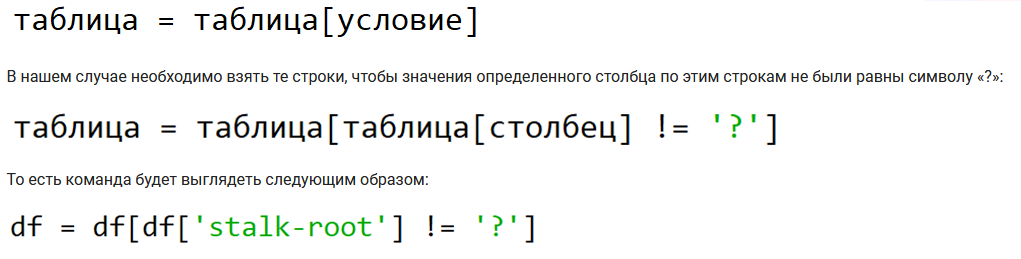

2. Удаление столбца

Одним из возможных решений в нашем случае является удаление столбца. Однако данный показатель может быть важным для исследователя и играть существенную роль в классификации.

Удаление столбца осуществляется с помощью метода drop(), либо ключевого слова del:

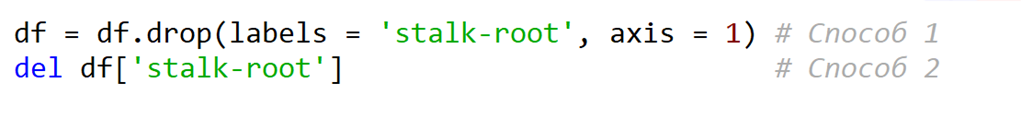

3. Новое уникальное значение

Заполнение пустых ячеек новым уникальным значением можно осуществить следующим образом. Сначала пропущенные значения заменяются на NaN (через np.nan). Затем с помощью метода fillna() все значения NaN заменяются на 0:

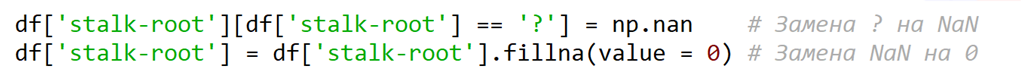

In [61]:
df['stalk-root'][df['stalk-root'] == '?'] = np.nan

In [62]:
len(df['stalk-root'][df['stalk-root'].isna()])

2480

Здесь можно было бы сразу символы «?» заменять на 0, однако метод fillna() используется при реализации прямого и обратного заполнения.

4. Метод прямого заполнения

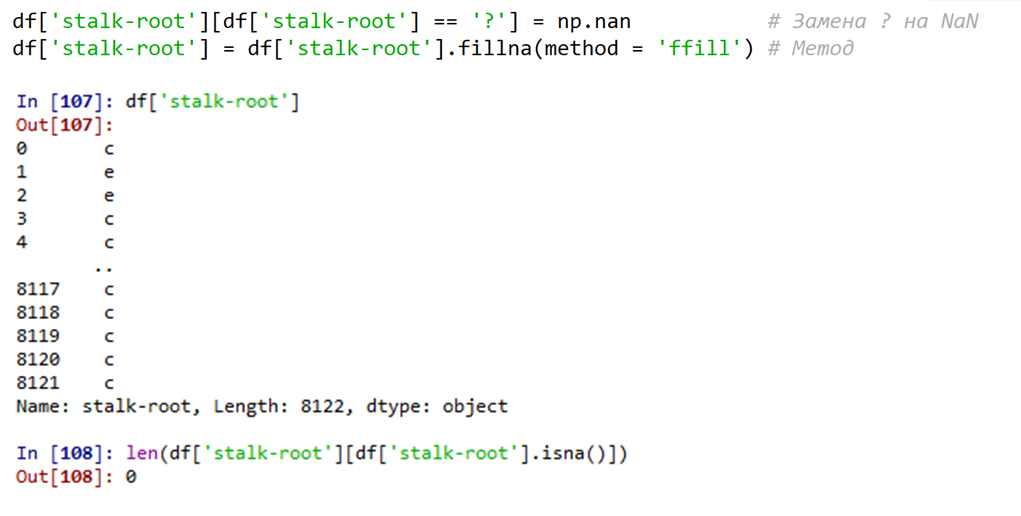

5. Метод обратного заполнения

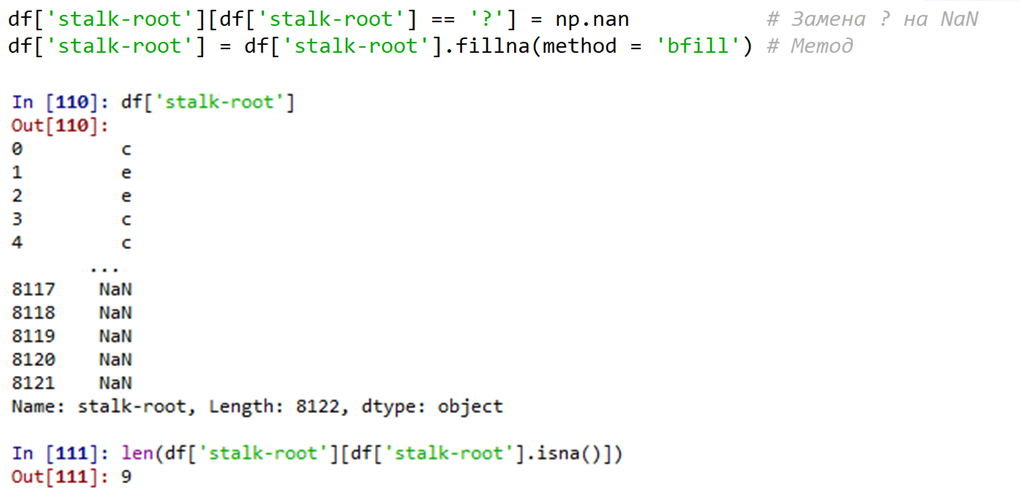

Выберем 3 способ обработки пропущенных значений. То есть символы «?» заменим на 0, проверим уникальные значения измененного столбца и сохраним набор данных в файле agaricus-lepiota2.csv:

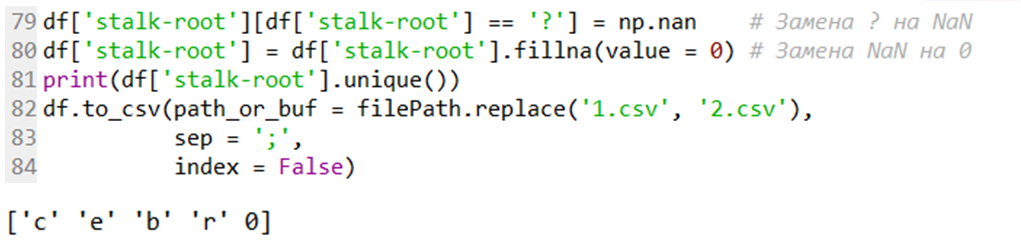

# Преобразование качественных данных

Набор данных Mushroom Data Set содержит только качественные данные. Чтобы проводить анализ таких данных их требуется сначала привести в числовой вид, то есть для каждого уникального значения столбца необходимо привести в соответствие уникальное числовое значение. Например, для столбца «class» значения e (не ядовитый), p (ядовитый) нужно заменить на 0 (не ядовитый), 1 (ядовитый).

Преобразовать символьные значения качественной переменной в цифровые можно с помощью класса sklearn.preprocessing.LabelEncoder библиотеки scikit-learn.

В программном коде ниже исходные значения столбца «class» сохраняются в переменную data_raw, а преобразованные – в переменную data_transform:

In [64]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder() # Создание экземпляра класса

#исходные значения
data_raw = df['class']
print('\nИсходный массив: \n', data_raw)
le.fit(data_raw)                  # Заполнение экземпляра исходным массивом
print('Классы', le.classes_)      # Классы (уникальные значения исходного массива)

# Преобразованние значения
data_transform = le.transform(data_raw) # Преобразование (преобразованный массив)
print('\nПреобразованный массив :\n', data_transform)
print('Классы:', np.unique(data_transform))   # Классы (уникальные значения преобразованного масива)


Исходный массив: 
 0       e
1       p
2       e
3       e
4       e
       ..
8117    e
8118    e
8119    e
8120    p
8121    e
Name: class, Length: 8122, dtype: object
Классы ['e' 'p']

Преобразованный массив :
 [0 1 0 ... 0 1 0]
Классы: [0 1]


Таким образом, массив значений e, p был преобразован в массив значений 0, 1.

Создадим таблицу преобразованных значений df_transform типа DataFrame. Добавление столбца в таблицу осуществляется следующим образом:

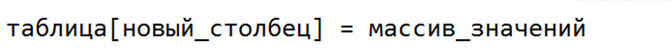

In [65]:
df_transform = pd.DataFrame()
df_transform['class'] = data_transform

In [66]:
df_transform

,class
0,0
1,1
2,0
3,0
4,0
...,...
8117,0
8118,0
8119,0
8120,1


С помощью цикла преобразуем все столбцы и сохраним их в таблицу df_transform:

In [67]:
df_transform = pd.DataFrame()
for col in df.columns:
  data_raw = df[col]
  le.fit(data_raw)
  data_transform = le.transform(data_raw)
  df_transform[col] = data_transform

In [68]:
df_transform

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8118,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8119,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8120,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


Для проверки правильности команд мы можем вывести уникальные значения исходных столбцов (таблица df) и преобразованных столбцов (таблица df_transform):

In [70]:
for col in df.columns:
  print(col,  df.loc[:, col].unique(), df_transform.loc[:, col].unique())

class ['e' 'p'] [0 1]
cap-shape ['b' 'x' 's' 'f' 'k' 'c'] [0 5 4 2 3 1]
cap-surface ['s' 'y' 'f' 'g'] [2 3 0 1]
cap-color ['w' 'g' 'y' 'n' 'e' 'p' 'b' 'u' 'c' 'r'] [8 3 9 4 2 5 0 7 1 6]
bruises? ['t' 'f'] [1 0]
odor ['l' 'p' 'n' 'a' 'f' 'c' 'y' 's' 'm'] [3 6 5 0 2 1 8 7 4]
gill-attachment ['f' 'a'] [1 0]
gill-spacing ['c' 'w'] [0 1]
gill-size ['b' 'n'] [0 1]
gill-color ['n' 'k' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] [ 5  4  2  7 10  3  9  1  0  8 11  6]
stalk-shape ['e' 't'] [0 1]
stalk-root ['c' 'e' 'b' 'r' nan] [1 2 0 3 4]
stalk-surface-above-ring ['s' 'f' 'k' 'y'] [2 0 1 3]
stalk-surface-below-ring ['s' 'f' 'y' 'k'] [2 0 3 1]
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] [7 6 3 0 4 2 8 5 1]
veil-color ['w' 'n' 'o' 'y'] [2 0 1 3]
ring-number ['o' 't' 'n'] [1 2 0]
ring-type ['p' 'e' 'l' 'f' 'n'] [4 0 2 1 3]
spore-print-color ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] [3 2 6 1 7 5 4 8 0]
popula

По данному списку видно соответствие уникальных буквенных значений исходных столбцов уникальным числовым значениям преобразованных столбцов.

Сохраним преобразованные данные в файл agaricus-lepiota3.csv.

In [73]:
df_transform.to_csv('agaricus-lepiota3.csv', sep = ';', index = False)

# Преобразование количественных данных

1. Логарифмирование

Логарифмическое преобразование как зависимых (Y), так и независимых переменных (X) часто используется на практике. При этом, экономисты зачастую работают с натуральными логарифмами, для которых используется символ .

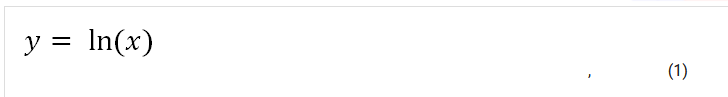

где x – преобразуемые (исходные) данные,

y – преобразованные данные.

Применение:

·       Дисперсионный анализ: для того, чтобы эффекты воздействия факторов суммировались, а не перемножались.

2. Преобразование к обратному корню

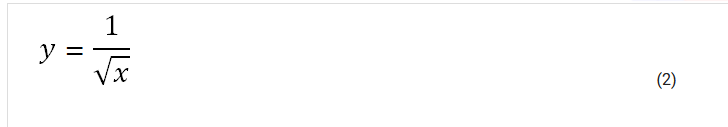

3. Преобразование Бокса-Кокса

Преобразование Бокса-Кокса – обобщение степенных преобразований:

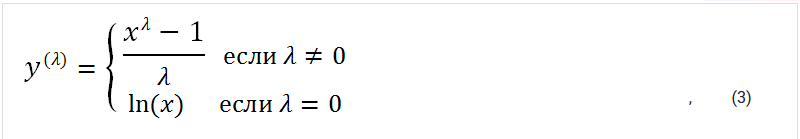

где λ – параметр преобразования.

Преобразование Бокса-Кокса применимо только для положительных переменных. Если переменные содержат отрицательные значения, можно либо сдвинуть распределение, добавив константу, либо использовать преобразование Йео-Джонсона.

4. Стандартизация

Стандартизация данных – процесс приведения вектора каждого признака к такому виду, что его математическое ожидание станет нулевым, а дисперсия – единичной:

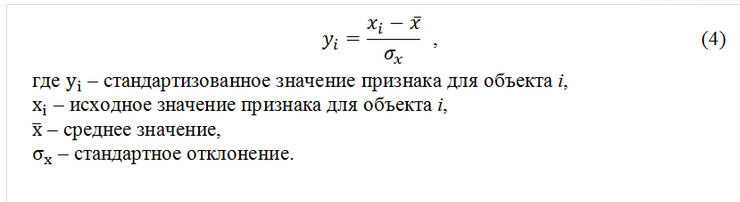

Применение: для смещения значений признака относительно единого центра в нуле, выравнивания разброса значений.

5. Нормализация

Нормализация – процесс масштабирования вектора каждого признака, то есть приведение его к такому виду, что вектор будет иметь единичную норму (при этом есть разные способы оценки или подсчета нормы).

Применение: для приведения значений признака к одинаковому масштабу, например к диапазону [0; 1].

Виды: max-норма (5), L1-норма (6), L2-норма (7).

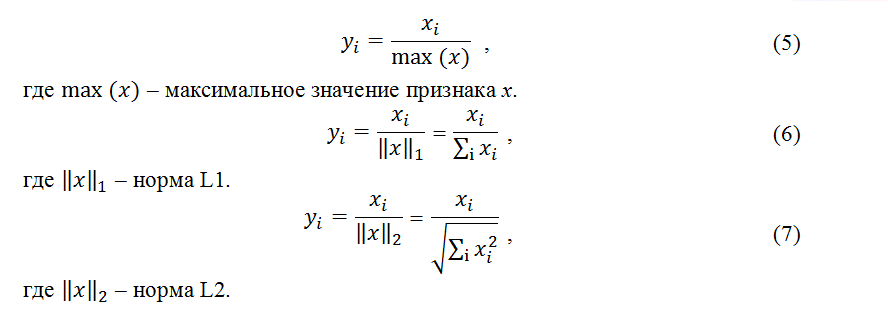